**Table of contents**    
- Libraries    
- Reading and cleaning the data    
- Scaling the data    
- Optimal n_clusters    
- Fitting kmeans    
  - Cluster centers    
  - Cluster centers for non-scaled data    
- PCA    
  - Eigen vectors    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Country clustering project

## Libraries

In [433]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree, set_link_color_palette
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Reading and cleaning the data

In [434]:
df = pd.read_excel('clustering_data.xlsx')

In [435]:
df

,Unnamed: 0,Country,Total fertility rate,region,Median age,Life expectancy at birth,Income Gini index,Wealth Gini Index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP
0,0,Niger,6.73,Africa,14.8,60.48,37.3,0.682,24.0,17.2,16.751,0.646,21.458482,22.383247,29.118,590.63
1,1,Angola,5.76,Africa,15.9,62.51,51.3,0.731,24.7,21.4,67.460,0.901,22.436538,24.376501,28.870,1953.53
2,2,DR Congo,5.56,Africa,16.7,62.23,42.1,0.755,24.2,19.0,46.235,0.948,21.443568,22.708692,29.928,577.21
3,3,Mali,5.45,Africa,16.0,62.81,36.1,0.707,25.8,18.8,44.677,0.876,22.999918,23.182216,28.936,873.79
4,4,Benin,5.39,Africa,17.0,62.60,37.8,0.707,23.8,18.7,48.972,0.785,22.666707,24.579594,29.149,1319.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,137,Mauritius,1.35,Africa,36.3,75.13,36.8,0.662,29.8,25.4,40.775,0.641,24.670173,26.066932,28.760,9106.24
138,138,Spain,1.29,Europe,43.9,82.78,34.3,0.694,35.6,33.6,81.056,0.438,27.162678,24.929999,32.130,30103.51
139,139,Italy,1.24,Europe,46.5,82.79,35.2,0.669,33.7,31.5,71.346,0.593,26.648903,24.857621,31.951,35657.50
140,140,Singapore,1.17,East and Southeast Asia,35.6,86.51,45.9,0.757,30.1,27.9,100.000,0.748,24.401980,23.142858,31.861,72794.00


In [436]:
df['region'].unique()

array(['Africa', 'South Asia', 'East and Southeast Asia', 'Middle East',
       'Australia and Oceania', 'Central Asia',
       'Central America and the Caribbean', 'South America', 'Europe',
       'North America'], dtype=object)

#### We will be clustering countries from Africa, Europe and South America

In [437]:
df = df[df['region'].isin(['Africa',
'Europe',
'South America'])]

In [438]:
df = df.set_index('Country')

In [439]:
df.head(5)

,Unnamed: 0,Total fertility rate,region,Median age,Life expectancy at birth,Income Gini index,Wealth Gini Index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP
Country,,,,,,,,,,,,,,,
Niger,0,6.73,Africa,14.8,60.48,37.3,0.682,24.0,17.2,16.751,0.646,21.458482,22.383247,29.118,590.63
Angola,1,5.76,Africa,15.9,62.51,51.3,0.731,24.7,21.4,67.460,0.901,22.436538,24.376501,28.870,1953.53
DR Congo,2,5.56,Africa,16.7,62.23,42.1,0.755,24.2,19.0,46.235,0.948,21.443568,22.708692,29.928,577.21
Mali,3,5.45,Africa,16.0,62.81,36.1,0.707,25.8,18.8,44.677,0.876,22.999918,23.182216,28.936,873.79
Benin,4,5.39,Africa,17.0,62.60,37.8,0.707,23.8,18.7,48.972,0.785,22.666707,24.579594,29.149,1319.16


In [440]:
df = df.drop(columns=["Unnamed: 0",'Wealth Gini Index'],axis=1)

In [441]:
df.head(5)

,Total fertility rate,region,Median age,Life expectancy at birth,Income Gini index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP
Country,,,,,,,,,,,,,
Niger,6.73,Africa,14.8,60.48,37.3,24.0,17.2,16.751,0.646,21.458482,22.383247,29.118,590.63
Angola,5.76,Africa,15.9,62.51,51.3,24.7,21.4,67.460,0.901,22.436538,24.376501,28.870,1953.53
DR Congo,5.56,Africa,16.7,62.23,42.1,24.2,19.0,46.235,0.948,21.443568,22.708692,29.928,577.21
Mali,5.45,Africa,16.0,62.81,36.1,25.8,18.8,44.677,0.876,22.999918,23.182216,28.936,873.79
Benin,5.39,Africa,17.0,62.60,37.8,23.8,18.7,48.972,0.785,22.666707,24.579594,29.149,1319.16


## Scaling the data

In [442]:
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df.loc[:,~df.columns.isin(['region'])]),
                               columns = df.loc[:,~df.columns.isin(['region'])].columns,
                               index = df.index)

In [443]:
df_std.head()

,Total fertility rate,Median age,Life expectancy at birth,Income Gini index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP
Country,,,,,,,,,,,,
Niger,2.892325,-1.465652,-1.650713,-0.026808,-1.298687,-1.597336,-2.012112,0.542293,-1.532691,-1.738121,-0.303461,-0.665519
Angola,2.190058,-1.363514,-1.383932,1.609648,-1.126349,-0.788516,0.352302,1.358813,-1.113581,-0.644880,-0.489739,-0.612060
DR Congo,2.045261,-1.289233,-1.420729,0.534262,-1.249448,-1.250699,-0.637358,1.509309,-1.539082,-1.559624,0.304947,-0.666045
Mali,1.965622,-1.354229,-1.344506,-0.167076,-0.855533,-1.289214,-0.710003,1.278762,-0.872166,-1.299910,-0.440165,-0.654412
Benin,1.922183,-1.261377,-1.372104,0.031636,-1.347926,-1.308472,-0.509740,0.987377,-1.014951,-0.533489,-0.280176,-0.636942


## Optimal n_clusters

In [445]:
def optimal_k_means(data,max_k):
    means =[]
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    plt.plot(means,inertias,'o-')
    plt.xlabel('n_clusters')
    plt.ylabel('Inertia')
    plt.show()

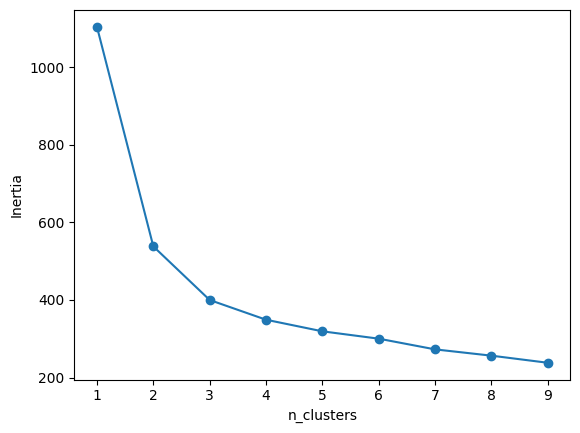

In [446]:
optimal_k_means(df_std,10)

## Fitting kmeans

In [447]:
kmeans = KMeans(n_clusters=3,
                init='random',
                random_state=123,
                n_init=20)

In [448]:
results = kmeans.fit(df_std)

In [449]:
results.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1])

In [450]:
results.inertia_

399.5411061632468

In [451]:
results.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1])

### Cluster centers

In [453]:
results.cluster_centers_

array([[ 1.11594415, -1.09088999, -1.01997313,  0.51413129, -0.92528876,
        -1.02763135, -0.8477709 ,  0.82638532, -1.12620081, -0.81148631,
        -0.31823287, -0.63210936],
       [-0.78697291,  1.04042908,  1.039354  , -0.83100976,  0.99504445,
         1.06342541,  0.7603145 , -0.59709917,  0.86720989,  0.19804847,
         1.08551115,  1.06352741],
       [-0.63710778,  0.30996797,  0.21301588,  0.24698331,  0.13304084,
         0.19584486,  0.29655066, -0.45526524,  0.55872817,  0.89507896,
        -0.81188273, -0.35191867]])

In [454]:
df_std_center = pd.DataFrame(results.cluster_centers_,
                          columns=df_std.columns)
df_std_center

,Total fertility rate,Median age,Life expectancy at birth,Income Gini index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP
0,1.115944,-1.090890,-1.019973,0.514131,-0.925289,-1.027631,-0.847771,0.826385,-1.126201,-0.811486,-0.318233,-0.632109
1,-0.786973,1.040429,1.039354,-0.831010,0.995044,1.063425,0.760315,-0.597099,0.867210,0.198048,1.085511,1.063527
2,-0.637108,0.309968,0.213016,0.246983,0.133041,0.195845,0.296551,-0.455265,0.558728,0.895079,-0.811883,-0.351919


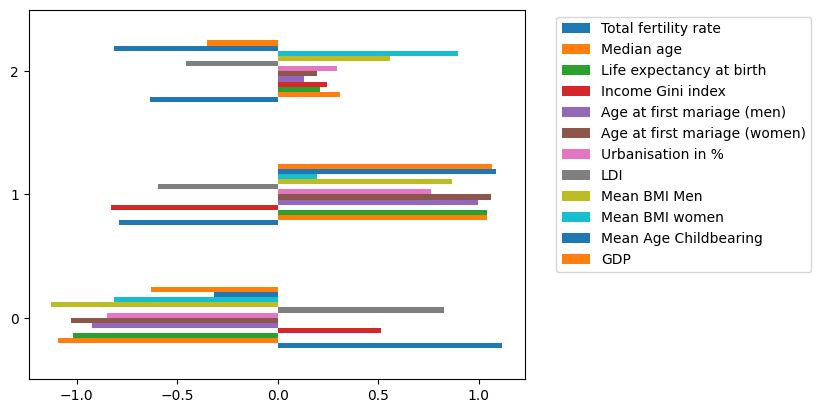

In [455]:
df_std_center.plot.barh()
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [456]:
df['group'] = results.labels_

In [457]:
df.head(5)

,Total fertility rate,region,Median age,Life expectancy at birth,Income Gini index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP,group
Country,,,,,,,,,,,,,,
Niger,6.73,Africa,14.8,60.48,37.3,24.0,17.2,16.751,0.646,21.458482,22.383247,29.118,590.63,0
Angola,5.76,Africa,15.9,62.51,51.3,24.7,21.4,67.460,0.901,22.436538,24.376501,28.870,1953.53,0
DR Congo,5.56,Africa,16.7,62.23,42.1,24.2,19.0,46.235,0.948,21.443568,22.708692,29.928,577.21,0
Mali,5.45,Africa,16.0,62.81,36.1,25.8,18.8,44.677,0.876,22.999918,23.182216,28.936,873.79,0
Benin,5.39,Africa,17.0,62.60,37.8,23.8,18.7,48.972,0.785,22.666707,24.579594,29.149,1319.16,0


In [458]:
df['group'].unique()

array([0, 2, 1])

### Cluster centers for non-scaled data

In [459]:
df.groupby('group').mean(numeric_only=True)

,Total fertility rate,Median age,Life expectancy at birth,Income Gini index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP
group,,,,,,,,,,,,
0,4.276389,18.836111,65.279444,41.927778,25.516667,20.158333,41.722333,0.734722,22.407089,24.072736,29.098333,1442.375278
1,1.648000,41.790000,80.949333,30.420000,33.316667,31.016667,76.210533,0.290167,27.059015,25.913372,30.967200,44671.433333
2,1.855000,33.923077,74.661538,39.642308,29.815385,26.511538,66.264308,0.334462,26.339126,27.184234,28.441115,8585.638462


In [460]:
n_clusters = 3

In [477]:
for i in range(n_clusters):
    print(f'''To cluster {i} belong:\
    {df[df['group'] == i].index.values}''')

To cluster 0 belong:    ['Niger' 'Angola' 'DR Congo' 'Mali' 'Benin' 'Chad' 'Uganda' 'Burundi'
 'Guinea' 'Mozambique' 'Liberia' 'Guinea-Bissau' 'Nigeria' 'Sudan'
 'Cameroon' 'Zambia' 'Tanzania' 'Congo' 'Togo' 'Senegal' 'Burkina Faso'
 'Central African Republic' 'Ethiopia' 'Zimbabwe' 'Sierra Leone' 'Gambia'
 'Ghana' 'Madagascar' 'Mauritania' 'Malawi' 'Gabon' 'Rwanda' 'Kenya'
 'Namibia' 'Lesotho' 'Comoros']
To cluster 1 belong:    ['Algeria' 'France' 'Tunisia' 'Iceland' 'Ireland' 'Norway' 'Netherlands'
 'Denmark' 'Belgium' 'Finland' 'Sweden' 'Luxembourg' 'United Kingdom'
 'Estonia' 'Lithuania' 'Slovenia' 'Switzerland' 'Germany' 'Latvia'
 'Austria' 'Malta' 'Czech Republic' 'Hungary' 'Cyprus' 'Slovakia'
 'Croatia' 'Portugal' 'Greece' 'Spain' 'Italy']
To cluster 2 belong:    ['Egypt' 'Botswana' 'Morocco' 'Bolivia' 'Peru' 'Argentina' 'South Africa'
 'Djibouti' 'Guyana' 'Ecuador' 'Colombia' 'Paraguay' 'Seychelles' 'Chile'
 'Uruguay' 'Brazil' 'Romania' 'Moldova' 'Ukraine' 'Albania' 'Belarus'
 '

## PCA

In [464]:
pca = PCA(n_components=2)
results_pca = pca.fit_transform(df_std)

### Eigen vectors

In [465]:
eigen_vectors = pd.DataFrame(pca.components_,
             columns = df_std.columns)

In [466]:
pca.components_

array([[ 0.32351948, -0.34132861, -0.33664851,  0.21028612, -0.32190531,
        -0.34303646, -0.27732731,  0.24958966, -0.33716736, -0.20301254,
        -0.19307481, -0.26191828],
       [-0.21252687,  0.0230226 , -0.03597728,  0.29533316, -0.08665292,
        -0.04907941,  0.06974166, -0.20307994,  0.19793037,  0.54989402,
        -0.58434803, -0.35600686]])

In [467]:
eigen_vectors

,Total fertility rate,Median age,Life expectancy at birth,Income Gini index,Age at first mariage (men),Age at first mariage (women),Urbanisation in %,LDI,Mean BMI Men,Mean BMI women,Mean Age Childbearing,GDP
0,0.323519,-0.341329,-0.336649,0.210286,-0.321905,-0.343036,-0.277327,0.24959,-0.337167,-0.203013,-0.193075,-0.261918
1,-0.212527,0.023023,-0.035977,0.295333,-0.086653,-0.049079,0.069742,-0.20308,0.197930,0.549894,-0.584348,-0.356007


#### Sum of squared elements of eigen vectors should be equal to 1.

In [468]:
eigen_vectors.loc[[1]].apply(lambda x: x**2).sum(axis=1)

1    1.0
dtype: float64

In [469]:
eigen_vectors.loc[[0]].apply(lambda x: x**2).sum(axis=1)

0    1.0
dtype: float64

In [470]:
pca.explained_variance_ratio_

array([0.62499921, 0.13546556])

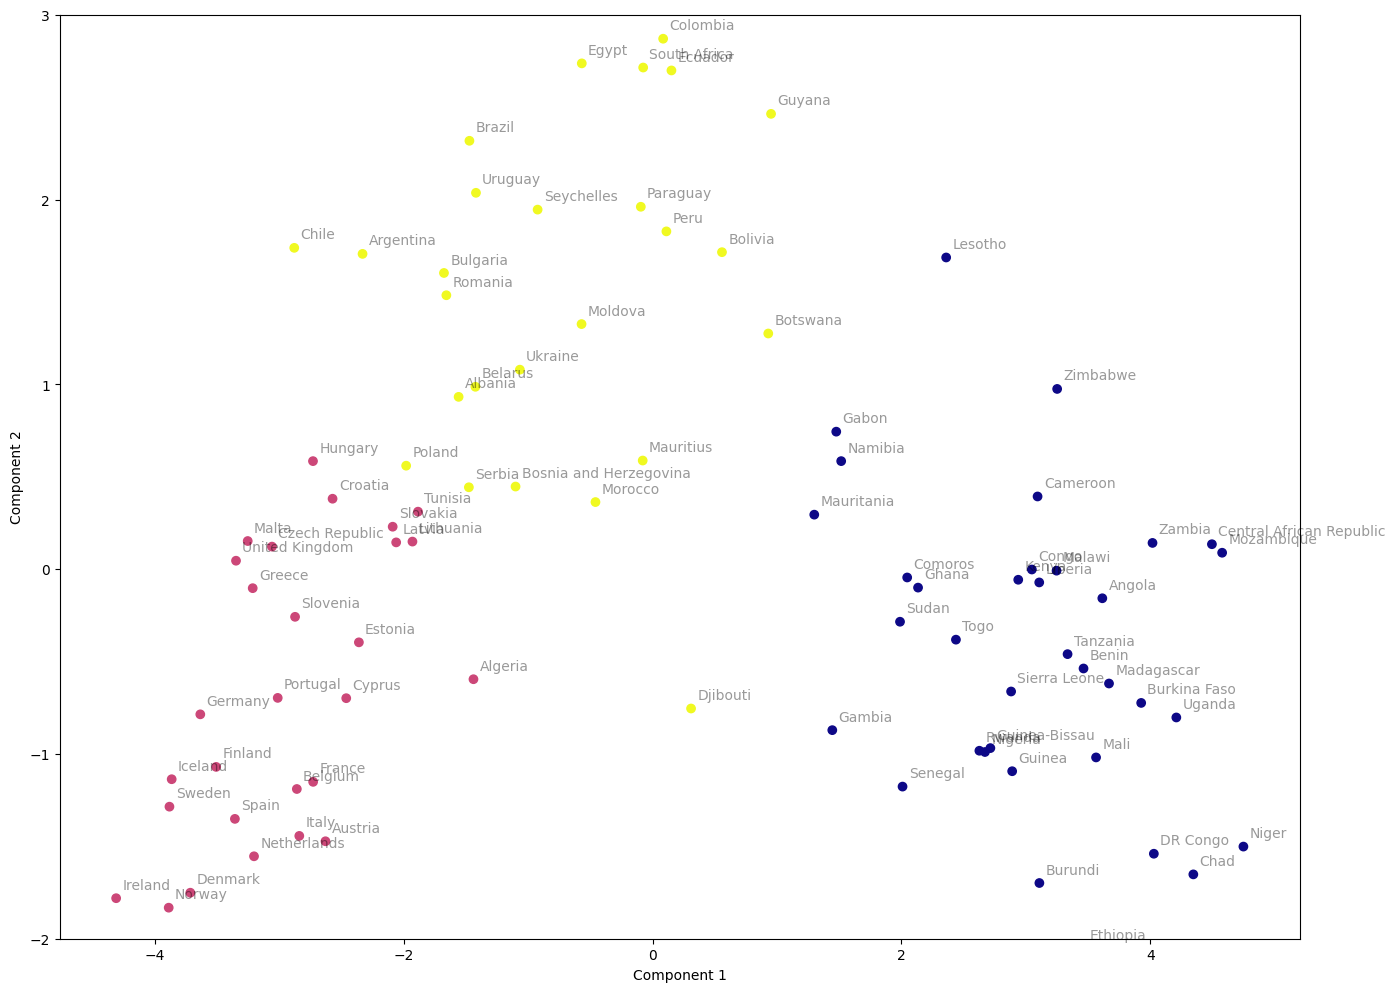

In [471]:
plt.figure(figsize=(16,12))
plt.scatter(results_pca[:,0], results_pca[:,1],
           c = kmeans.fit(df_std).labels_, # kolor reprezentuje przynależność do skupienia
           cmap='plasma')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.ylim(-2,3.0)
for i in range(len(df_std)):
    plt.annotate(df_std.index[i],(results_pca[i,0]+0.05, results_pca[i,1]+0.05),alpha=0.4)
plt.show()